In [7]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

In [8]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
x=np.genfromtxt(dic+'x_flux.txt')
y=np.genfromtxt(dic+'y_flux.txt')

ly_flux=np.genfromtxt(dic+'ly_flux.txt')
heii_flux=np.genfromtxt(dic+'heii_flux.txt')
civ_flux=np.genfromtxt(dic+'civ_flux.txt')
civ_flux=civ_flux[40:300,50:]
heii_flux=heii_flux[40:300,50:]
ly_flux=ly_flux[40:300,50:]
x=x[40:300]
y=y[50:]

In [9]:
ly_flux[ly_flux<1e-10]=1e5
heii_ly=heii_flux/ly_flux
civ_ly=civ_flux/ly_flux

In [10]:
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'

np.savetxt(savdic+'heii_ly.txt',heii_ly)
np.savetxt(savdic+'civ_ly.txt',civ_ly)
np.savetxt(savdic+'x_ratio.txt',x)
np.savetxt(savdic+'y_ratio.txt',y)

In [11]:
origin_world=np.array([220.3520886,40.05269183])
sources_list=np.array([[220.3517351,40.05269063],
                       [220.3521004,40.05267509],
                       [220.3519736,40.05221132],
                       [220.3520722,40.05297709],
                       
                       [220.3531717,40.05223288],
                       [220.3497255,40.05104434],
                       [220.3492992,40.05225575],
                       [220.3499296,40.05351636],
                       [220.3525,40.0545]])*u.deg
sources_list[:,0]=sources_list[:,0]-0.0002*u.deg
source_name=['G-2','G-3','G-4','G-6','G-5','G-1']
source_name_coor=np.array([[220.3520722,40.05297709],[220.3531717,40.05223288],
                           [220.3497255,40.05104434],[220.3492992,40.05225575],
                           [220.3499296,40.05351636],[220.3525,40.0545]])*u.deg
delta_sources=(sources_list-origin_world*u.deg).to(u.arcsec).value
delta_source_name_coor=(source_name_coor-origin_world*u.deg).to(u.arcsec).value

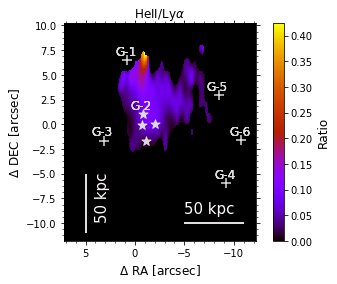

In [12]:
fig,ax=plt.subplots(1,1)
img=ax.pcolormesh(x,y,heii_ly.T,cmap='gnuplot')
cbar=plt.colorbar(img,ax=ax)
cbar.ax.set_ylabel(r'Ratio',fontsize=12)
for k in range(4):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='*',color='gainsboro',s=90)
for k in range(4,delta_sources.shape[0]):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='+',color='gainsboro',s=90)
    for k in range(len(source_name)):
        ax.annotate(source_name[k],xy=(delta_source_name_coor[k,0],delta_source_name_coor[k,1]),
                    xytext=(-5,5),textcoords="offset points",color='gainsboro',fontsize=12)
ax.minorticks_on()
ax.set_title(r'HeII/Ly$\alpha$')
ax.set_xlabel(r'$\Delta$ RA [arcsec]',fontsize=12)
ax.set_ylabel(r'$\Delta$ DEC [arcsec]',fontsize=12)
ax.set_aspect('equal')
ax.tick_params(axis='both', which='both',top=True,right=True)
ax.invert_xaxis()
ax.vlines(x=5,ymin=-11,ymax=-11+6.,lw=2,color='gainsboro')
ax.text(4,-6,'50 kpc',color='snow',fontsize=15,rotation=90)
ax.hlines(y=-10,xmin=-5,xmax=-11.,lw=2,color='gainsboro')
ax.text(-5,-9,'50 kpc',color='snow',fontsize=15)
plt.show()
# savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
# plt.savefig(savdic+'HeII_Ly_ratio.png',dpi=300)

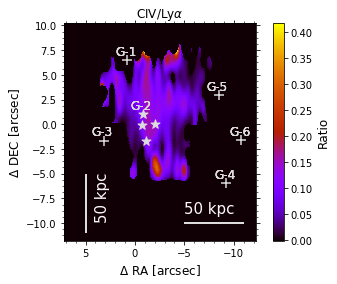

In [13]:
fig,ax=plt.subplots(1,1)
img=ax.pcolormesh(x,y,civ_ly.T,cmap='gnuplot')
cbar=plt.colorbar(img,ax=ax)
cbar.ax.set_ylabel(r'Ratio',fontsize=12)
for k in range(4):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='*',color='gainsboro',s=90)
for k in range(4,delta_sources.shape[0]):
    ax.scatter(delta_sources[k,0],delta_sources[k,1],marker='+',color='gainsboro',s=90)
    for k in range(len(source_name)):
        ax.annotate(source_name[k],xy=(delta_source_name_coor[k,0],delta_source_name_coor[k,1]),
                    xytext=(-5,5),textcoords="offset points",color='gainsboro',fontsize=12)
ax.minorticks_on()
ax.set_title(r'CIV/Ly$\alpha$')
ax.set_xlabel(r'$\Delta$ RA [arcsec]',fontsize=12)
ax.set_ylabel(r'$\Delta$ DEC [arcsec]',fontsize=12)
ax.set_aspect('equal')
ax.tick_params(axis='both', which='both',top=True,right=True)
ax.invert_xaxis()
ax.vlines(x=5,ymin=-11,ymax=-11+6.,lw=2,color='gainsboro')
ax.text(4,-6,'50 kpc',color='snow',fontsize=15,rotation=90)
ax.hlines(y=-10,xmin=-5,xmax=-11.,lw=2,color='gainsboro')
ax.text(-5,-9,'50 kpc',color='snow',fontsize=15)
# plt.show()
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
plt.savefig(savdic+'CIV_Ly_ratio.png',dpi=300)